## Superstore Sales 

In [22]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn import preprocessing

In [324]:
store_data =  pd.read_csv('Superstore_Sales_Dataset.csv')

In [325]:
store_data.shape

(9800, 18)

In [326]:
pd.set_option('display.max_columns', 20)

In [327]:
store_data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [328]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [329]:
store_data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [330]:
store_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [331]:
store_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [332]:
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'], dayfirst=True)
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'], dayfirst=True)

In [333]:
store_data.duplicated().sum()

0

In [334]:
store_data = store_data.drop(['Row ID','Order ID','Customer Name', 'Country'],axis=1)

In [335]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [336]:
store_data[store_data['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2018-12-05,2018-12-10,Standard Class,QJ-19255,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,2016-11-07,2016-11-09,Second Class,SV-20785,Consumer,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,2017-04-06,2017-04-10,Standard Class,VM-21685,Home Office,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [337]:
store_data.loc[store_data['Postal Code'].isnull(), 'Postal Code'] = '05401'

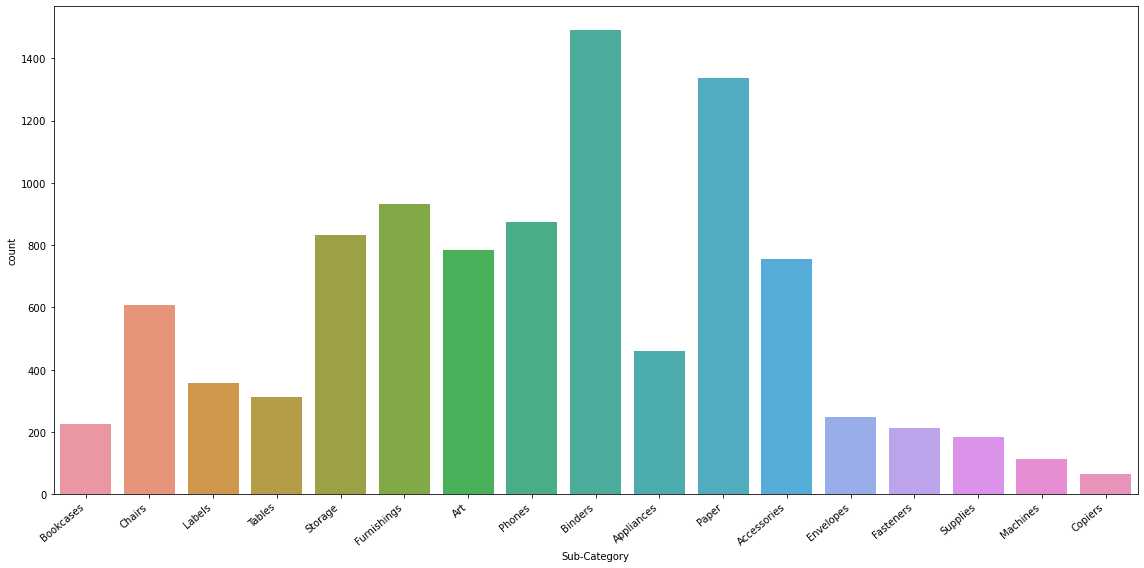

In [338]:
plt.figure(figsize=(16,8))
ax = sns.countplot(store_data['Sub-Category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

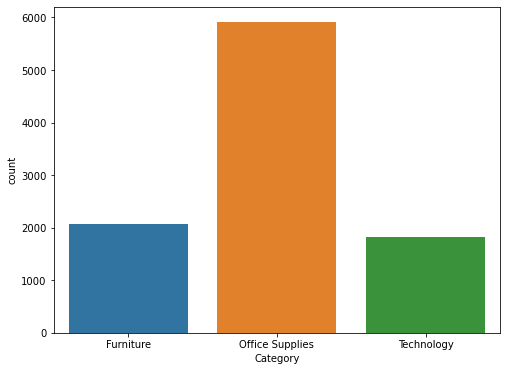

In [339]:
plt.figure(figsize=(8,6))
sns.countplot(store_data['Category'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

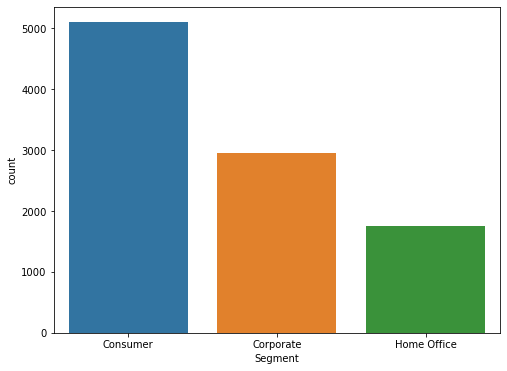

In [340]:
plt.figure(figsize=(8,6))
sns.countplot(store_data['Segment'])

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

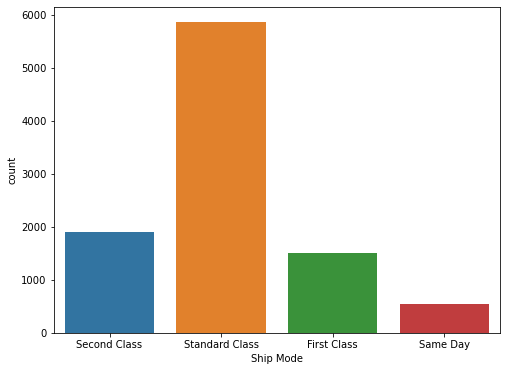

In [341]:
plt.figure(figsize=(8,6))
sns.countplot(store_data['Ship Mode'])

In [342]:
store_data_sub = store_data.groupby(['Category','Sub-Category']).agg({'Sales': sum})
store_data_sub.sort_values(by='Sales',ascending=False).groupby('Category').head(5).sort_index()

Sales
Category        Sub-Category             
Furniture       Bookcases     113813.1987
                Chairs        322822.7310
                Furnishings    89212.0180
                Tables        202810.6280
Office Supplies Appliances    104618.4030
                Binders       200028.7850
                Paper          76828.3040
                Storage       219343.3920
                Supplies       46420.3080
Technology      Accessories   164186.7000
                Copiers       146248.0940
                Machines      189238.6310
                Phones        327782.4480

In [343]:
store_data.groupby(['Sub-Category']).sum()['Sales']

Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Region', ylabel='count'>

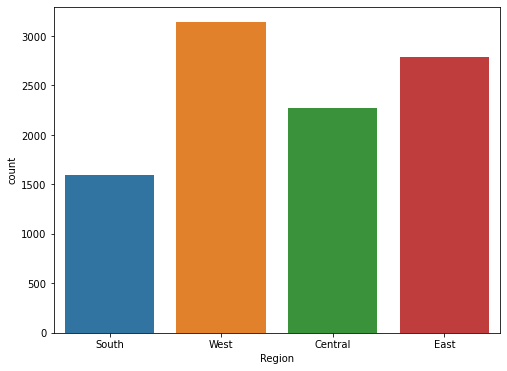

In [344]:
plt.figure(figsize=(8,6))
sns.countplot(store_data['Region'])

<AxesSubplot:xlabel='State'>

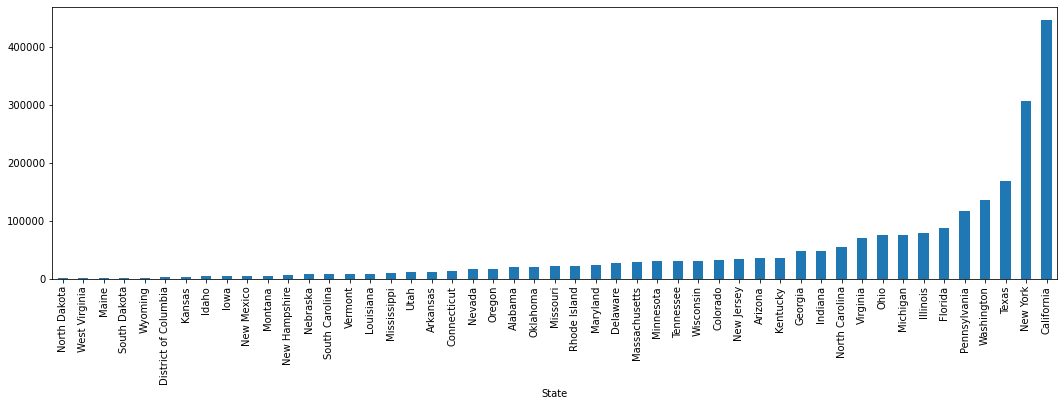

In [345]:
store_data.groupby(['State']).sum()['Sales'].sort_values().plot(kind='bar', figsize=(18,5))

In [346]:
store_data['Month'] = store_data['Order Date'].dt.month_name()
store_data['Year'] = store_data['Order Date'].dt.year

In [347]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016


Text(0.5, 1.0, 'Sales based on Month')

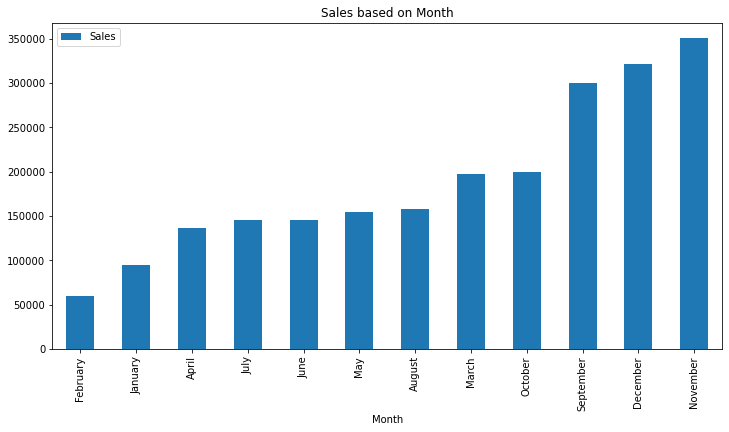

In [348]:
sales_month = store_data.groupby('Month').agg({'Sales':sum}).sort_values(by='Sales').plot.bar(figsize=(12,6))
plt.title("Sales based on Month")

In [349]:
top_sales = store_data['Product Name'].value_counts()

In [350]:
top_sales_10 = top_sales.head(10)

In [351]:
top_sales_10

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

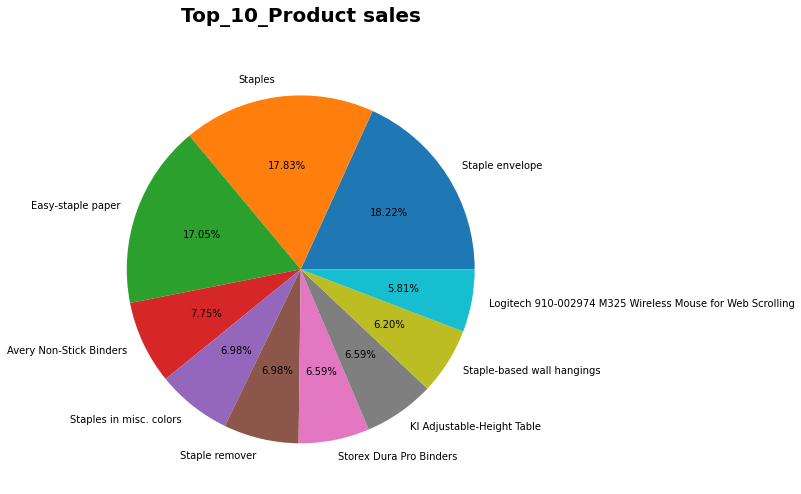

In [352]:
plt.figure(figsize = [10,8])
plt.pie(top_sales_10,labels=top_sales_10.index, autopct="%0.2f%%")
plt.title('Top_10_Product sales', pad = 30, fontsize=20, color='black',weight = 'bold');
plt.show()

In [353]:
store_data['Ship In Days'] = (store_data['Ship Date'] - store_data['Order Date']).dt.days

In [354]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days
0,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017,3
1,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017,3
2,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017,4
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016,7
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016,7


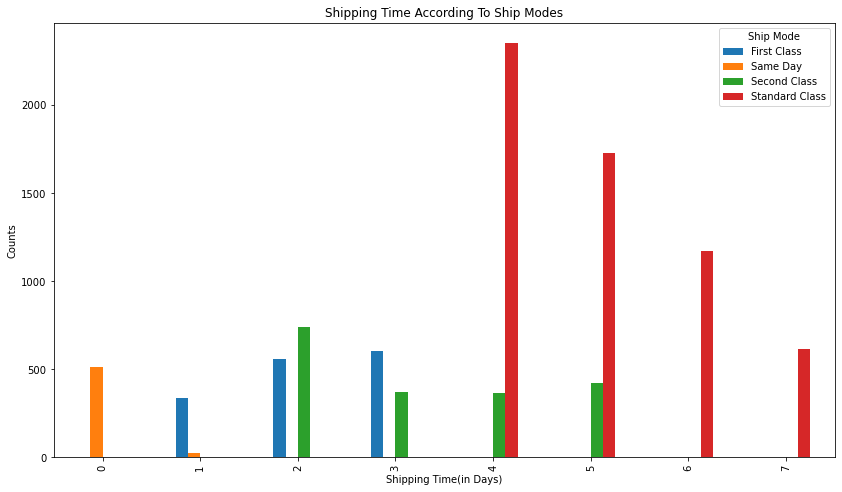

In [355]:
a = store_data.groupby(by = ['Ship In Days', 'Ship Mode']).count()['Product ID']

# plot
a.unstack().plot(kind='bar', figsize=(14, 8))

plt.xlabel("Shipping Time(in Days)")
plt.ylabel("Counts")
plt.title("Shipping Time According To Ship Modes")

plt.show()

In [356]:
store_data['Delayed'] = store_data['Ship In Days'] > 4

In [357]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017,3,False
1,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017,3,False
2,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017,4,False
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016,7,True
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016,7,True


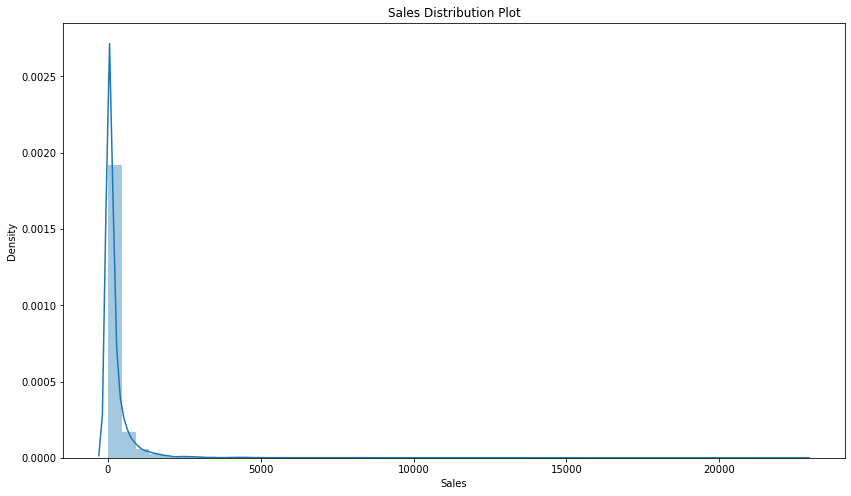

In [358]:
plt.figure(figsize=(14, 8))
sns.distplot(store_data.Sales)

plt.title('Sales Distribution Plot')
plt.show()

## Klasterizacija

In [359]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9800 non-null   datetime64[ns]
 1   Ship Date     9800 non-null   datetime64[ns]
 2   Ship Mode     9800 non-null   object        
 3   Customer ID   9800 non-null   object        
 4   Segment       9800 non-null   object        
 5   City          9800 non-null   object        
 6   State         9800 non-null   object        
 7   Postal Code   9800 non-null   object        
 8   Region        9800 non-null   object        
 9   Product ID    9800 non-null   object        
 10  Category      9800 non-null   object        
 11  Sub-Category  9800 non-null   object        
 12  Product Name  9800 non-null   object        
 13  Sales         9800 non-null   float64       
 14  Month         9800 non-null   object        
 15  Year          9800 non-null   int64   

Trebaju nam numeričke vrednosti za sve kolone:

In [360]:
store_data.nunique()

Order Date      1230
Ship Date       1326
Ship Mode          4
Customer ID      793
Segment            3
City             529
State             49
Postal Code      627
Region             4
Product ID      1861
Category           3
Sub-Category      17
Product Name    1849
Sales           5757
Month             12
Year               4
Ship In Days       8
Delayed            2
dtype: int64

In [ ]:
store_data['Postal Code'] = store_data['Postal Code'].astype("string")

In [361]:
store_data_copy = store_data.copy()

In [362]:
labelEncoder = preprocessing.LabelEncoder()

In [363]:
rows_to_encode = ['Ship Mode','Customer ID', 'City', 'State', 'Segment', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Product ID', 'Month', 'Delayed']

In [364]:
store_data[rows_to_encode[0]]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9795    Standard Class
9796    Standard Class
9797    Standard Class
9798    Standard Class
9799    Standard Class
Name: Ship Mode, Length: 9800, dtype: object

In [366]:
for row in rows_to_encode:
    labelEncoder.fit(store_data[row])
    store_data[row] = labelEncoder.transform(store_data[row])

In [367]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,2017-11-08,2017-11-11,2,143,0,194,15,187,2,12,0,4,386,261.9600,9,2017,3,0
1,2017-11-08,2017-11-11,2,143,0,194,15,187,2,55,0,5,838,731.9400,9,2017,3,0
2,2017-06-12,2017-06-16,2,237,1,265,3,514,3,946,1,10,1432,14.6200,6,2017,4,0
3,2016-10-11,2016-10-18,3,705,0,153,8,138,2,319,0,16,366,957.5775,10,2016,7,1
4,2016-10-11,2016-10-18,3,705,0,153,8,138,2,1316,1,14,573,22.3680,10,2016,7,1


Korelacija atributa:

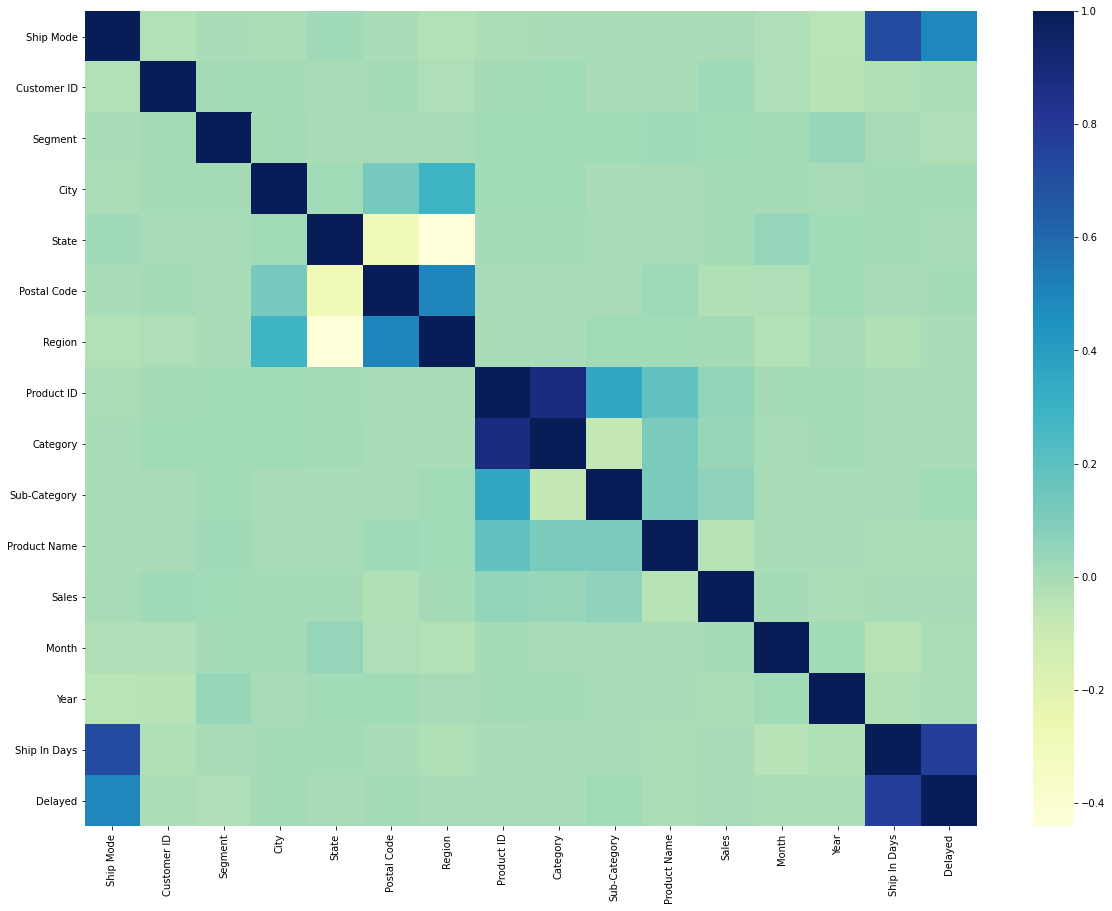

In [368]:
plt.figure(figsize=(20,15))
sns.heatmap(store_data.corr(),annot=True, cmap = "Blues", linewidth = 0.30)
plt.show()

In [371]:
store_data['Order Date'].value_counts()

2017-09-05    38
2017-11-10    35
2018-12-01    34
2018-12-02    34
2018-12-09    33
              ..
2017-06-29     1
2017-07-20     1
2017-02-20     1
2015-03-29     1
2018-01-06     1
Name: Order Date, Length: 1230, dtype: int64

In [372]:
rows_to_encode_dates = ['Order Date','Ship Date']

In [373]:
for row in rows_to_encode_dates:
    labelEncoder.fit(store_data[row])
    store_data[row] = labelEncoder.transform(store_data[row])

In [374]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,857,923,2,143,0,194,15,187,2,12,0,4,386,261.9600,9,2017,3,0
1,857,923,2,143,0,194,15,187,2,55,0,5,838,731.9400,9,2017,3,0
2,725,782,2,237,1,265,3,514,3,946,1,10,1432,14.6200,6,2017,4,0
3,515,563,3,705,0,153,8,138,2,319,0,16,366,957.5775,10,2016,7,1
4,515,563,3,705,0,153,8,138,2,1316,1,14,573,22.3680,10,2016,7,1


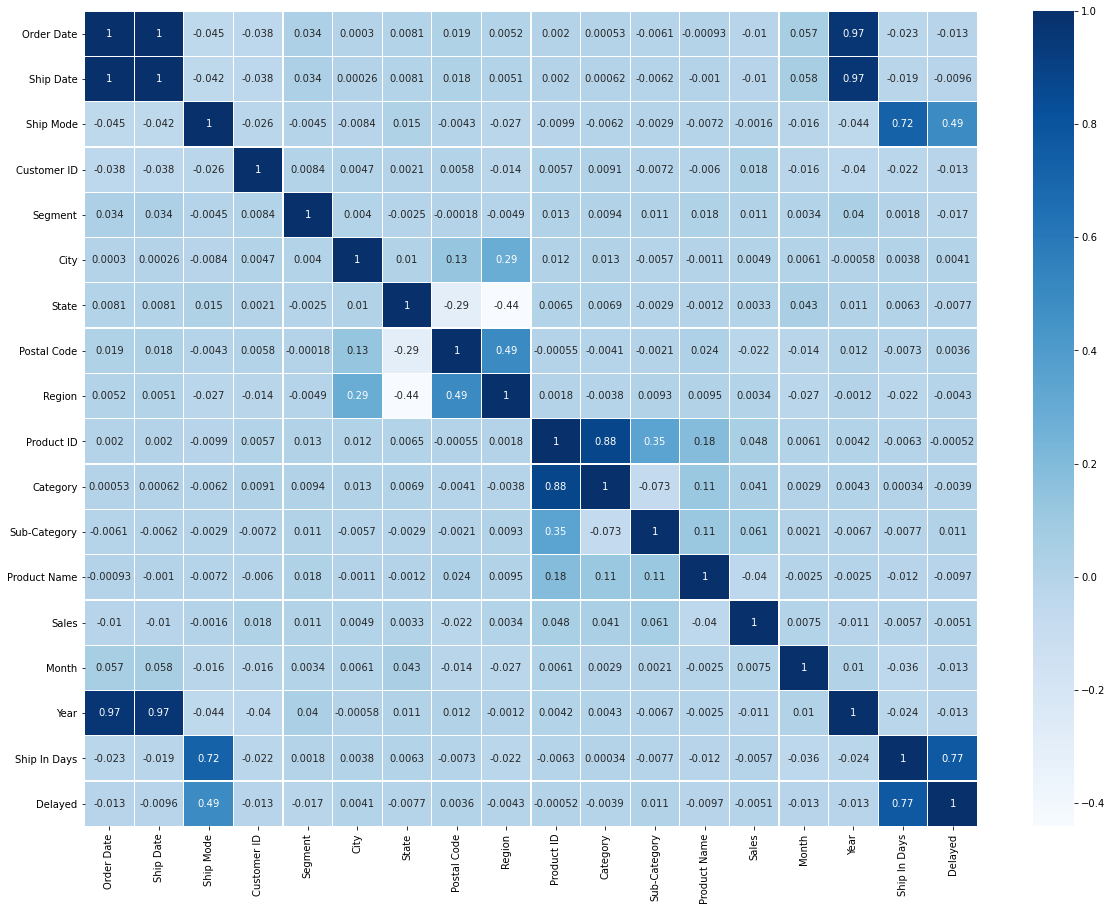

In [378]:
plt.figure(figsize=(20,15))
sns.heatmap(store_data.corr(),annot=True, cmap = "Blues", linewidth = 0.30)
plt.show()

Priprema normalizovanog dataseta:

In [379]:
names = store_data.columns
scaler = preprocessing.MinMaxScaler()

store_data_narray = scaler.fit_transform(store_data)
store_data_normalized = pd.DataFrame(store_data_narray, columns=names)

In [382]:
store_data_normalized.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,0.697315,0.696604,0.666667,0.180556,0.0,0.367424,0.312500,0.298722,0.666667,0.006452,0.0,0.2500,0.208874,0.011552,0.818182,0.666667,0.428571,0.0
1,0.697315,0.696604,0.666667,0.180556,0.0,0.367424,0.312500,0.298722,0.666667,0.029570,0.0,0.3125,0.453463,0.032313,0.818182,0.666667,0.428571,0.0
2,0.589910,0.590189,0.666667,0.299242,0.5,0.501894,0.062500,0.821086,1.000000,0.508602,0.5,0.6250,0.774892,0.000626,0.545455,0.666667,0.571429,0.0
3,0.419040,0.424906,1.000000,0.890152,0.0,0.289773,0.166667,0.220447,0.666667,0.171505,0.0,1.0000,0.198052,0.042280,0.909091,0.333333,1.000000,1.0
4,0.419040,0.424906,1.000000,0.890152,0.0,0.289773,0.166667,0.220447,0.666667,0.707527,0.5,0.8750,0.310065,0.000968,0.909091,0.333333,1.000000,1.0


## Algoritmi

In [383]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS

In [384]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as sch

Redukcija dimenzionalnosti:

In [385]:
store_data_x_array = np.array(store_data_normalized)

In [387]:
store_data_x_array.shape

(9800, 18)

In [388]:
pca = PCA(n_components = 18, random_state=42)
pca.fit(store_data_x_array)
animal_data_x_array_pca = pca.transform(store_data_x_array)

In [389]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 18.04060444,  34.13414377,  46.62080587,  55.98803985,
        63.6812632 ,  69.55784652,  75.19845215,  79.80621734,
        84.22453989,  88.58149197,  92.67051396,  96.38122689,
        98.9074258 ,  99.60178643,  99.83740099,  99.95980988,
        99.99987444, 100.        ])

Text(0, 0.5, 'Explained variance')

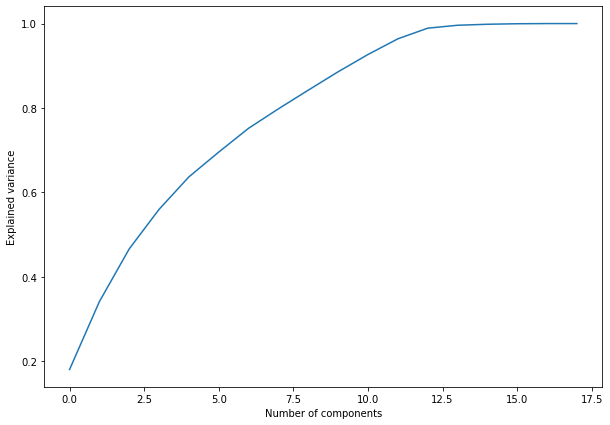

In [390]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [391]:
pca_95 = PCA(n_components = 0.95, random_state=42)
pca_95.fit(store_data_x_array)
store_data_x_array_pca_95 = pca_95.transform(store_data_x_array)

In [392]:
store_data_x_array_pca_95.shape

(9800, 12)

In [393]:
np.cumsum(pca_95.explained_variance_ratio_ * 100)

array([18.04060444, 34.13414377, 46.62080587, 55.98803985, 63.6812632 ,
       69.55784652, 75.19845215, 79.80621734, 84.22453989, 88.58149197,
       92.67051396, 96.38122689])

### KMeans

In [394]:
sil_array = []
chs_array = []
ssd_array = []
k_range = 10
for k in range(2, k_range):
    k_means = KMeans(n_clusters = k, random_state=0, n_jobs=-1).fit(store_data_x_array_pca_95)
    sil_array.append(silhouette_score(store_data_x_array_pca_95, k_means.labels_, metric = "euclidean"))
    chs_array.append(calinski_harabasz_score(store_data_x_array_pca_95, k_means.labels_))
    ssd_array.append(k_means.inertia_)

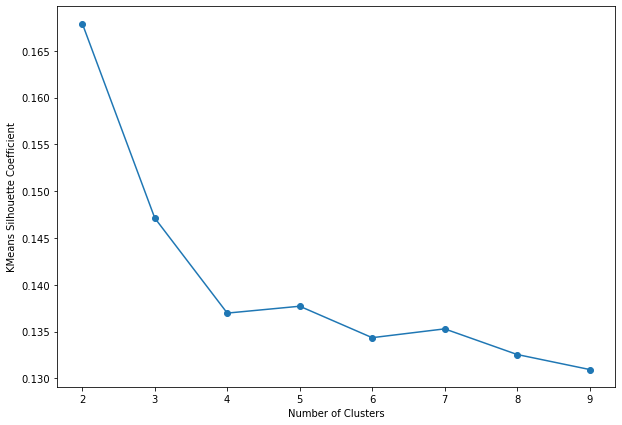

In [395]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'o-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("KMeans Silhouette Coefficient")
plt.show()

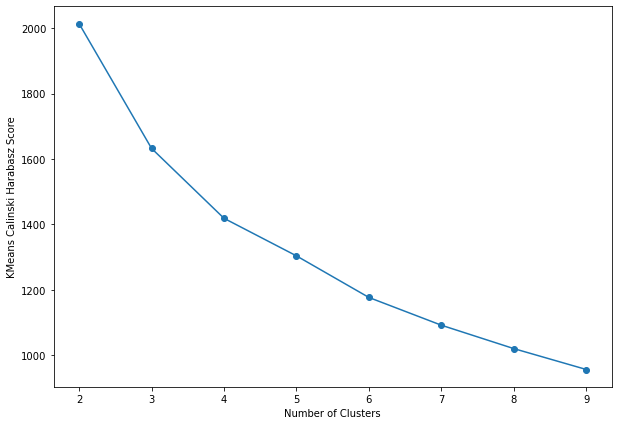

In [396]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), chs_array, 'o-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("KMeans Calinski Harabasz Score")
plt.show()

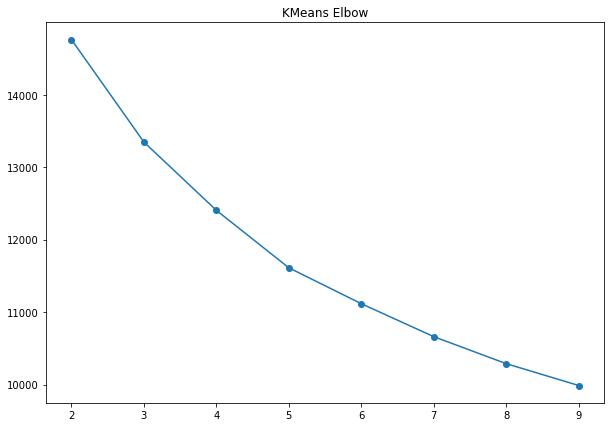

In [397]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), ssd_array, 'o-')
plt.xticks(range(2, 10))
plt.title("KMeans Elbow")
plt.show()

### DBSCAN

In [398]:
sil_array = []
chs_array = []
d_range = 10
for k in range(1, d_range):
    dbscan = DBSCAN(min_samples = k, n_jobs=-1).fit(store_data_x_array_pca_95)   
    sil_array.append(silhouette_score(store_data_x_array_pca_95, dbscan.labels_))
    chs_array.append(calinski_harabasz_score(store_data_x_array_pca_95, dbscan.labels_))

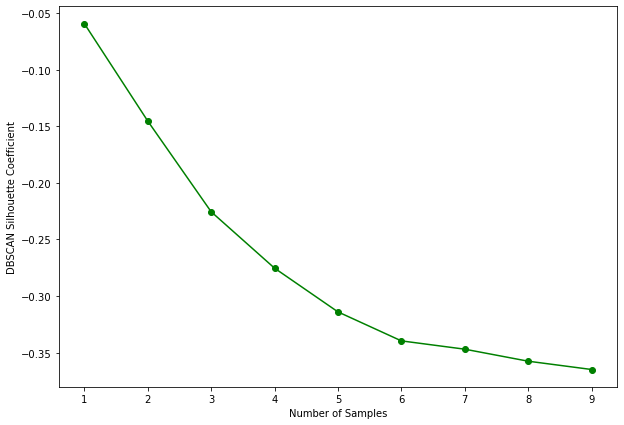

In [399]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), sil_array, 'go-')
plt.xticks(range(1, 10))
plt.xlabel("Number of Samples")
plt.ylabel("DBSCAN Silhouette Coefficient")
plt.show()

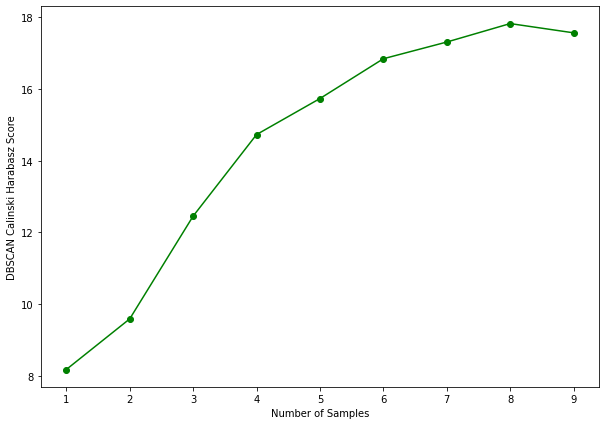

In [400]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), chs_array, 'go-')
plt.xticks(range(1, 10))
plt.xlabel("Number of Samples")
plt.ylabel("DBSCAN Calinski Harabasz Score")
plt.show()

### Agglomerative Clustering

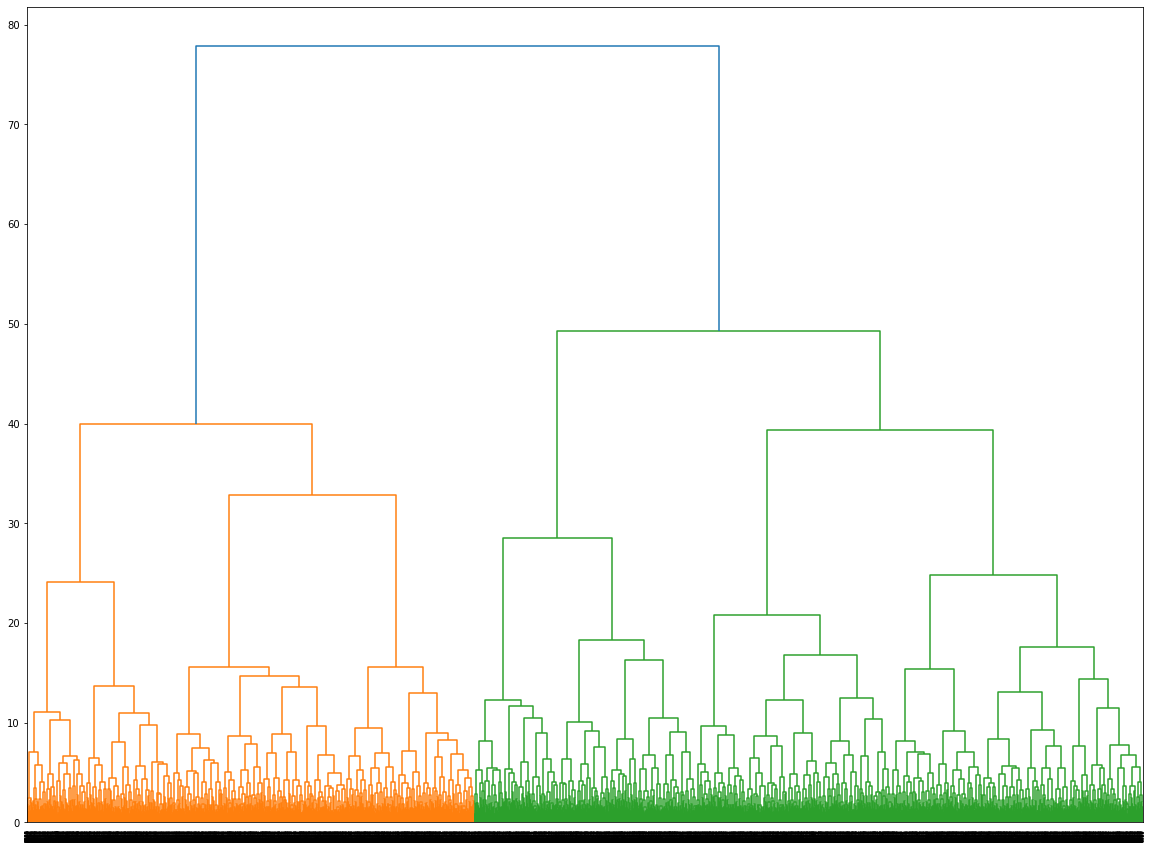

In [401]:
plt.figure(figsize=(20,15))
sch.dendrogram(sch.linkage(store_data_x_array_pca_95, method = "ward"))
plt.show()

In [402]:
sil_array = []
chs_array = []
a_range = 10
for k in range(2, a_range):
    hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(store_data_x_array_pca_95)
    sil_array.append(silhouette_score(store_data_x_array_pca_95, hcluster.labels_, metric = "euclidean"))
    chs_array.append(calinski_harabasz_score(store_data_x_array_pca_95, hcluster.labels_))

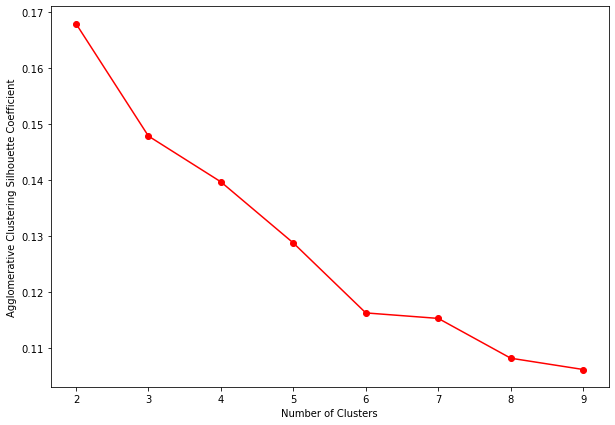

In [403]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'ro-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Agglomerative Clustering Silhouette Coefficient")
plt.show()

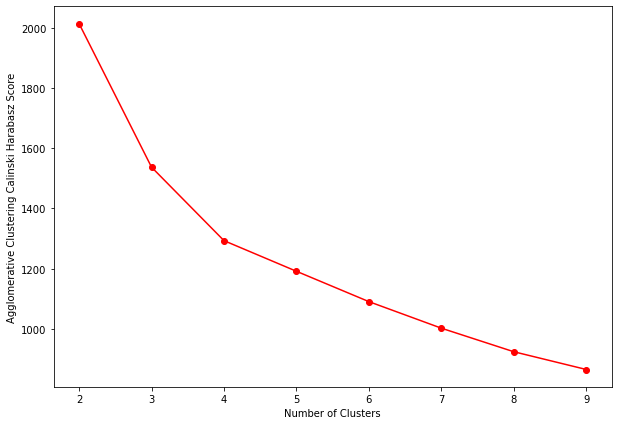

In [404]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), chs_array, 'ro-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Agglomerative Clustering Calinski Harabasz Score")
plt.show()

### Vizuelizacija klastera

Modeli sa najboljim parametrima:

In [405]:
k_means_fin = KMeans(n_clusters = 3, random_state=0, n_jobs=-1).fit(store_data_x_array_pca_95)

In [406]:
dbscan_fin = DBSCAN(min_samples = 4, n_jobs=-1).fit(store_data_x_array_pca_95)

In [407]:
hcluster_fin = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward').fit(store_data_x_array_pca_95)

2D vizuelizacija

KMeans

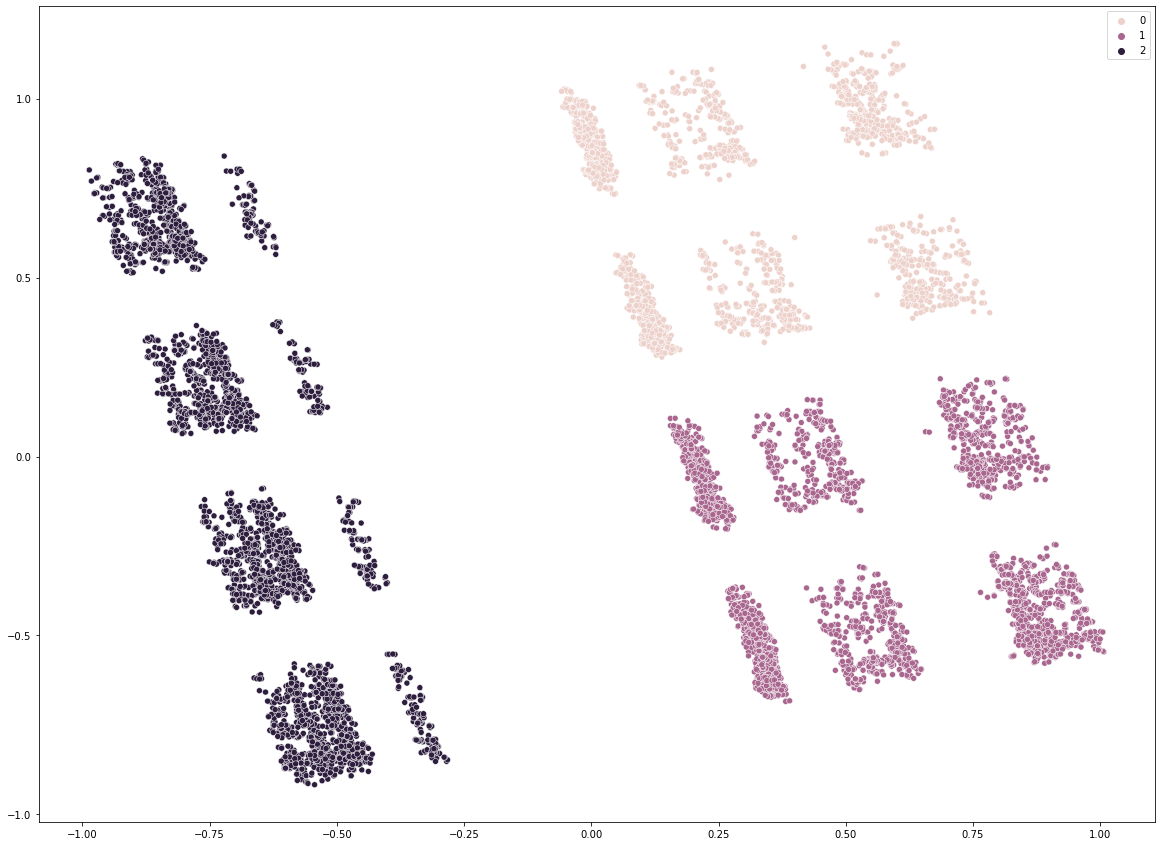

In [408]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = store_data_x_array_pca_95[:,0], y = store_data_x_array_pca_95[:,1],hue=k_means_fin.labels_)
plt.show()

DBSCAN

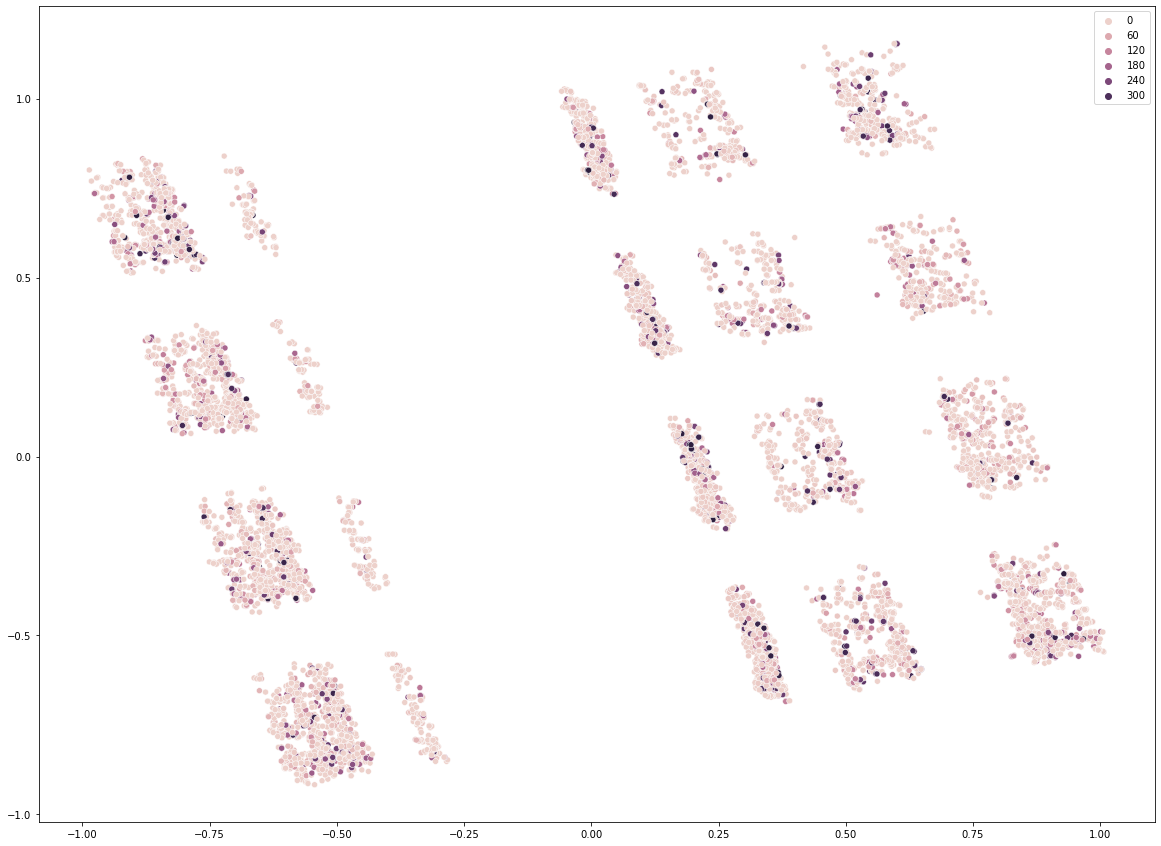

In [410]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = store_data_x_array_pca_95[:,0], y = store_data_x_array_pca_95[:,1],hue = dbscan_fin.labels_)
plt.show()

Agglomerative Clustering

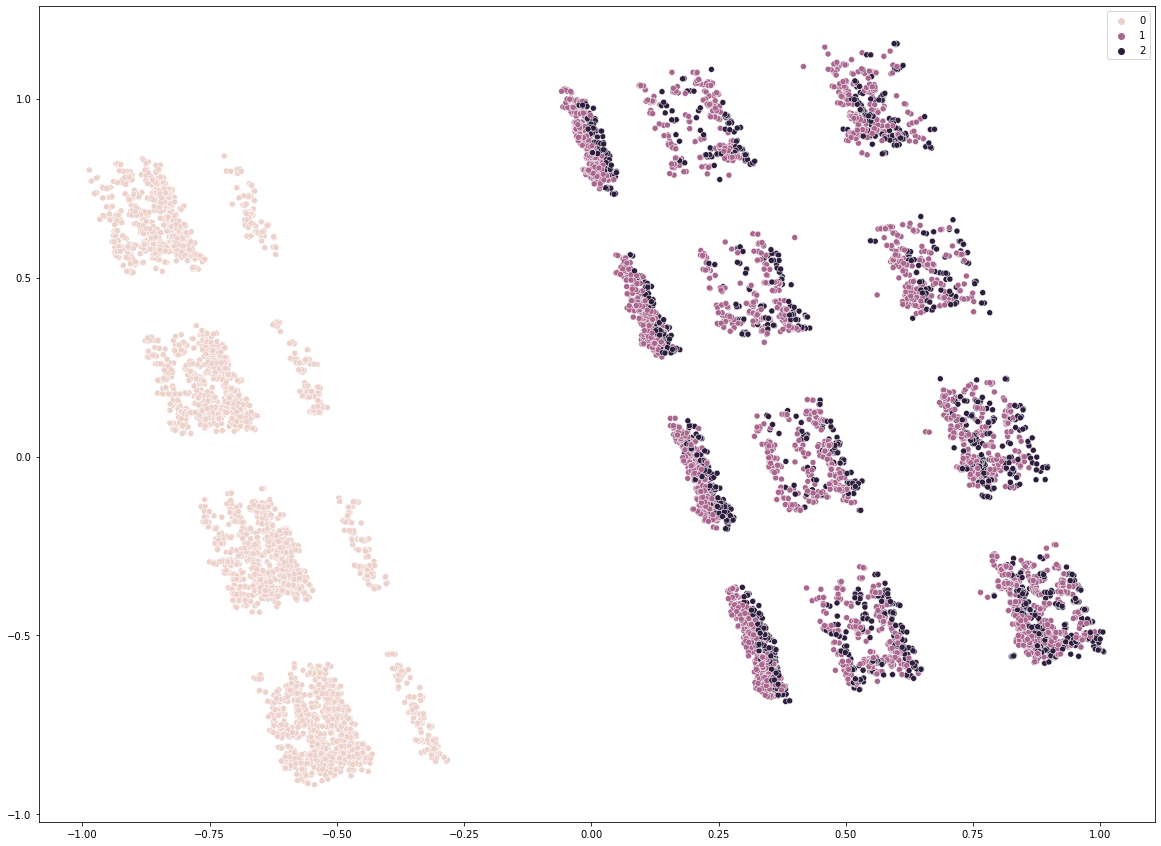

In [411]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = store_data_x_array_pca_95[:,0], y = store_data_x_array_pca_95[:,1], hue = hcluster_fin.labels_)
plt.show()

3D vizuelizacija

In [412]:
from mpl_toolkits.mplot3d import Axes3D

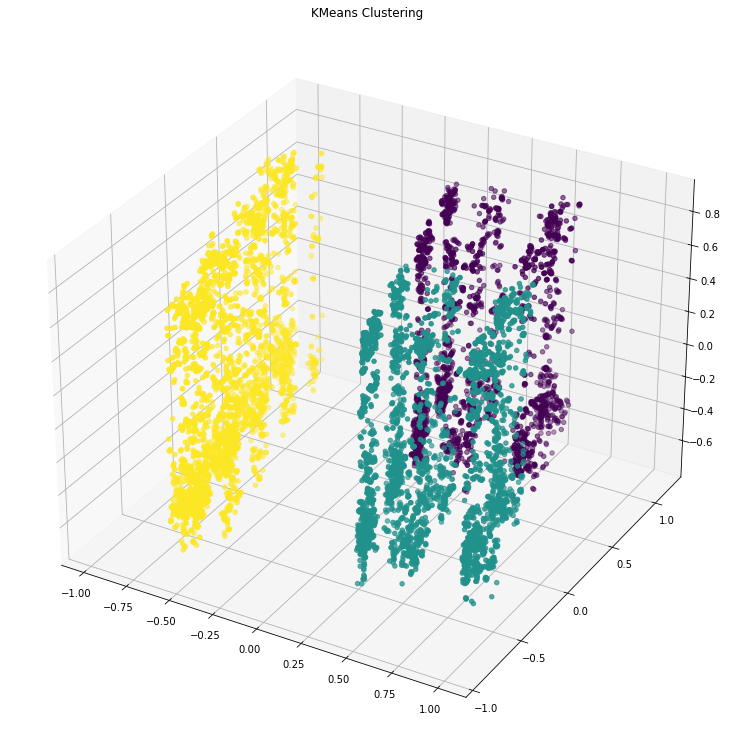

In [413]:
fig = plt.figure(figsize=(15,10))
axes = Axes3D(fig)

axes.scatter(store_data_x_array_pca_95[:,0], store_data_x_array_pca_95[:,1], store_data_x_array_pca_95[:,2], c=k_means_fin.labels_)
axes.set_title('KMeans Clustering')
plt.show()

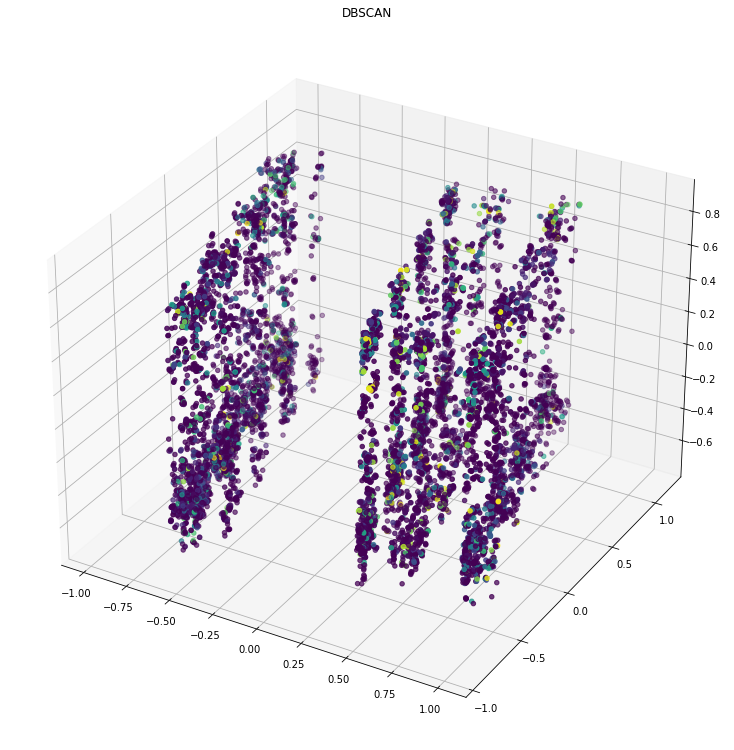

In [414]:
fig = plt.figure(figsize=(15,10))
axes = Axes3D(fig)

axes.scatter(store_data_x_array_pca_95[:,0], store_data_x_array_pca_95[:,1], store_data_x_array_pca_95[:,2], c = dbscan_fin.labels_)
axes.set_title('DBSCAN')
plt.show()

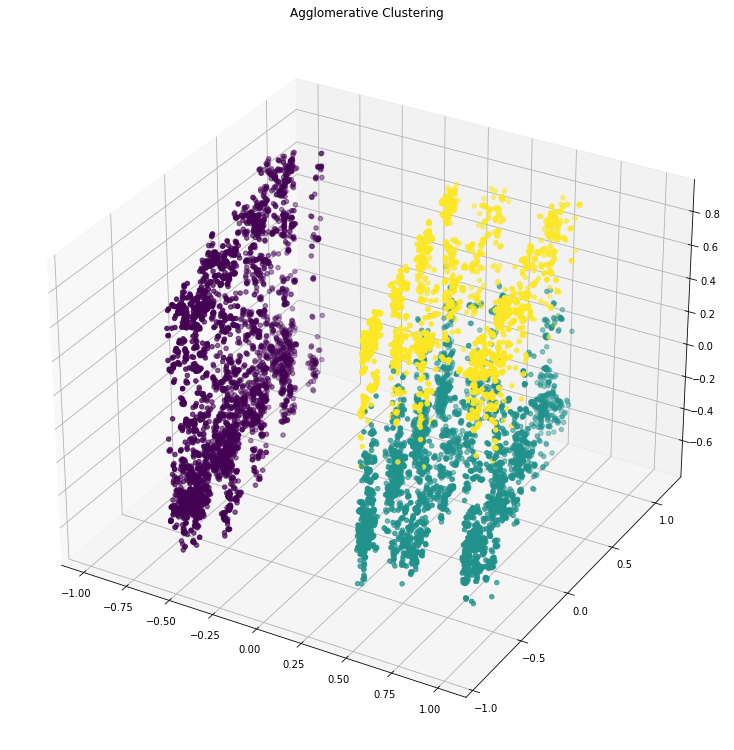

In [415]:
fig = plt.figure(figsize=(15,10))
axes = Axes3D(fig)

axes.scatter(store_data_x_array_pca_95[:,0], store_data_x_array_pca_95[:,1], store_data_x_array_pca_95[:,2], c = hcluster_fin.labels_)
axes.set_title('Agglomerative Clustering')
plt.show()

Od svih algoritama najbolje su se pokazali Agglomerative Clustering i KMeans.

#### Pregled klustera

In [436]:
k_means_fin.cluster_centers_

array([[ 0.28365174,  0.67304837, -0.01469568, -0.00321634,  0.0122698 ,
        -0.00471745,  0.00836659,  0.08199722,  0.01379457, -0.0259054 ,
         0.00156247, -0.00800873],
       [ 0.54214724, -0.29223597, -0.01018672, -0.0039209 , -0.00565425,
         0.01237811,  0.00189494,  0.06598588,  0.00514798, -0.02789861,
         0.00952538, -0.00251779],
       [-0.65268546, -0.14790711,  0.01793044,  0.00542515, -0.00240646,
        -0.0081293 , -0.00674353, -0.1081628 , -0.01291419,  0.04042909,
        -0.00939755,  0.00707969]])

In [437]:
first_cluster_kmeans_pca_95 = k_means_fin.cluster_centers_[0]
second_cluster_kmeans_pca_95 = k_means_fin.cluster_centers_[1]
third_cluster_kmeans_pca_95 = k_means_fin.cluster_centers_[2]

Vraćanje dimenzionalnosti:

In [438]:
first_cluster_kmeans_norm = pca_95.inverse_transform(first_cluster_kmeans_pca_95)
second_cluster_kmeans_norm = pca_95.inverse_transform(second_cluster_kmeans_pca_95)
third_cluster_kmeans_norm = pca_95.inverse_transform(third_cluster_kmeans_pca_95)

In [439]:
first_cluster_kmeans_normalized = pd.DataFrame(np.matrix(first_cluster_kmeans_norm), columns=names)
second_cluster_kmeans_normalized = pd.DataFrame(np.matrix(second_cluster_kmeans_norm), columns=names)
third_cluster_kmeans_normalized = pd.DataFrame(np.matrix(third_cluster_kmeans_norm), columns=names)

In [440]:
first_cluster_kmeans_normalized

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,0.262692,0.259346,0.630804,0.524344,0.316196,0.530081,0.472759,0.465935,0.520788,0.480122,0.485821,0.470032,0.506998,0.010574,0.55001,0.17949,0.411665,0.00289


In [441]:
second_cluster_kmeans_normalized

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,0.782625,0.782075,0.580397,0.499187,0.346401,0.525141,0.467173,0.48347,0.528816,0.485023,0.488631,0.472487,0.497388,0.010105,0.567416,0.851015,0.396723,0.000546


In [442]:
third_cluster_kmeans_normalized

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,0.564352,0.564596,0.961507,0.501557,0.320874,0.530271,0.463692,0.47924,0.52128,0.482707,0.484969,0.478614,0.495619,0.009994,0.551603,0.568702,0.809271,0.997767


Invertovanje normalizacije:

In [443]:
first_cluster_kmeans = scaler.inverse_transform(first_cluster_kmeans_normalized)
first_cluster_data = pd.DataFrame(np.matrix(first_cluster_kmeans), columns=names)

second_cluster_kmeans = scaler.inverse_transform(second_cluster_kmeans_normalized)
second_cluster_data = pd.DataFrame(np.matrix(second_cluster_kmeans), columns=names)

third_cluster_kmeans = scaler.inverse_transform(third_cluster_kmeans_normalized)
third_cluster_data = pd.DataFrame(np.matrix(third_cluster_kmeans), columns=names)

In [444]:
first_cluster_data

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,322.847972,343.633474,1.892412,415.280203,0.632392,279.882714,22.692433,291.674998,1.562364,893.026937,0.971642,7.520519,936.931493,239.815213,6.050107,2015.538469,2.881656,0.00289


Da bi smo bolje razumeli klastere, potrebno je invertovati numeričko kodiranje:

In [445]:
first_cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    1 non-null      float64
 1   Ship Date     1 non-null      float64
 2   Ship Mode     1 non-null      float64
 3   Customer ID   1 non-null      float64
 4   Segment       1 non-null      float64
 5   City          1 non-null      float64
 6   State         1 non-null      float64
 7   Postal Code   1 non-null      float64
 8   Region        1 non-null      float64
 9   Product ID    1 non-null      float64
 10  Category      1 non-null      float64
 11  Sub-Category  1 non-null      float64
 12  Product Name  1 non-null      float64
 13  Sales         1 non-null      float64
 14  Month         1 non-null      float64
 15  Year          1 non-null      float64
 16  Ship In Days  1 non-null      float64
 17  Delayed       1 non-null      float64
dtypes: float64(18)
memory usage: 272.0

In [446]:
for row in rows_to_encode:
    labelEncoder.fit(store_data_copy[row])
    first_cluster_data[row] = labelEncoder.inverse_transform([int(first_cluster_data[row])])

In [448]:
for row in rows_to_encode_dates:
    labelEncoder.fit(store_data_copy[row])
    first_cluster_data[row] = labelEncoder.inverse_transform([int(first_cluster_data[row])])

In [449]:
first_cluster_data

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,2016-02-07,2016-02-16,Same Day,KB-16315,Consumer,Marietta,Mississippi,59715.0,East,OFF-EN-10004206,Furniture,Envelopes,Jawbone JAMBOX Wireless Bluetooth Speaker,239.815213,June,2015.538469,2.881656,False


In [450]:
for row in rows_to_encode:
    labelEncoder.fit(store_data_copy[row])
    second_cluster_data[row] = labelEncoder.inverse_transform([int(second_cluster_data[row])])

for row in rows_to_encode_dates:
    labelEncoder.fit(store_data_copy[row])
    second_cluster_data[row] = labelEncoder.inverse_transform([int(second_cluster_data[row])])

In [451]:
second_cluster_data

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,2018-03-12,2018-03-15,Same Day,JM-16195,Consumer,Maple Grove,Mississippi,60098.0,East,OFF-FA-10000134,Furniture,Envelopes,Imation USB 2.0 Swivel Flash Drive USB flash d...,229.201507,June,2017.553046,2.777059,False


In [452]:
for row in rows_to_encode:
    labelEncoder.fit(store_data_copy[row])
    third_cluster_data[row] = labelEncoder.inverse_transform([int(third_cluster_data[row])])

for row in rows_to_encode_dates:
    labelEncoder.fit(store_data_copy[row])
    third_cluster_data[row] = labelEncoder.inverse_transform([int(third_cluster_data[row])])

In [453]:
third_cluster_data

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Ship In Days,Delayed
0,2017-05-07,2017-05-12,Second Class,JO-15280,Consumer,Marietta,Mississippi,60089.0,East,OFF-EN-10004773,Furniture,Envelopes,Imation Clip USB flash drive - 8 GB,226.686758,June,2016.706105,5.664899,False


In [454]:
first_cluster_data.iloc[0]

Order Date                            2016-02-07 00:00:00
Ship Date                             2016-02-16 00:00:00
Ship Mode                                        Same Day
Customer ID                                      KB-16315
Segment                                          Consumer
City                                             Marietta
State                                         Mississippi
Postal Code                                       59715.0
Region                                               East
Product ID                                OFF-EN-10004206
Category                                        Furniture
Sub-Category                                    Envelopes
Product Name    Jawbone JAMBOX Wireless Bluetooth Speaker
Sales                                          239.815213
Month                                                June
Year                                          2015.538469
Ship In Days                                     2.881656
Delayed       

In [455]:
second_cluster_data.iloc[0]

Order Date                                    2018-03-12 00:00:00
Ship Date                                     2018-03-15 00:00:00
Ship Mode                                                Same Day
Customer ID                                              JM-16195
Segment                                                  Consumer
City                                                  Maple Grove
State                                                 Mississippi
Postal Code                                               60098.0
Region                                                       East
Product ID                                        OFF-FA-10000134
Category                                                Furniture
Sub-Category                                            Envelopes
Product Name    Imation USB 2.0 Swivel Flash Drive USB flash d...
Sales                                                  229.201507
Month                                                        June
Year      

In [456]:
third_cluster_data.iloc[0]

Order Date                      2017-05-07 00:00:00
Ship Date                       2017-05-12 00:00:00
Ship Mode                              Second Class
Customer ID                                JO-15280
Segment                                    Consumer
City                                       Marietta
State                                   Mississippi
Postal Code                                 60089.0
Region                                         East
Product ID                          OFF-EN-10004773
Category                                  Furniture
Sub-Category                              Envelopes
Product Name    Imation Clip USB flash drive - 8 GB
Sales                                    226.686758
Month                                          June
Year                                    2016.706105
Ship In Days                               5.664899
Delayed                                       False
Name: 0, dtype: object

Kod KMeans klastera se primećuje da su godine različite. Za prvi je 2016, za drugi 2018 a za treći 2017.